In [8]:
from sklearn import svm
from skimage.feature import hog
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from random import shuffle

In [15]:
pathname = 'hw01_data/'
mnist = scipy.io.loadmat(pathname + 'mnist/train_hog66.mat')
mnist_org = scipy.io.loadmat(pathname + 'mnist/train_new.mat')
mnist['trainX'] = np.concatenate((mnist['trainX'][:, :-1], mnist_org['trainX']), axis=1)
mnist['validationX'] = np.concatenate((mnist['validationX'][:, :-1], mnist_org['validationX']), axis=1)

In [17]:
all_training_accuracy = []
all_validation_accuracy = []
size = 10000
all_C = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]
# all_C = range(40, 41)

validation_data = mnist['validationX'][:, :-1]
validation_labels = mnist['validationX'][:, -1:].ravel()
training_data = mnist['trainX'][:size, :-1]
training_labels = mnist['trainX'][:size, -1:].ravel()
for C in all_C:
	clf = svm.LinearSVC(C=C) # try linear or non-linear kernels
	clf.fit(training_data, training_labels)
	training_accuracy = clf.score(training_data, training_labels)
	validation_accuracy = clf.score(validation_data, validation_labels)
	all_training_accuracy.append(training_accuracy)
	all_validation_accuracy.append(validation_accuracy)
	print(C, ": ", validation_accuracy)
print(all_training_accuracy)
print(all_validation_accuracy)

max_idx = all_validation_accuracy.index(max(all_validation_accuracy))
print(all_C[max_idx], ': ', max(all_validation_accuracy))

1e-06 :  0.9788
1e-05 :  0.9859
0.0001 :  0.9876
0.001 :  0.9861
0.01 :  0.9877
0.1 :  0.9867
1 :  0.987
10 :  0.9864
[0.98504000000000003, 0.99219999999999997, 0.99495999999999996, 0.99275999999999998, 0.99414000000000002, 0.99421999999999999, 0.99365999999999999, 0.99450000000000005]
[0.9788, 0.9859, 0.98760000000000003, 0.98609999999999998, 0.98770000000000002, 0.98670000000000002, 0.98699999999999999, 0.98640000000000005]
0.01 :  0.9877


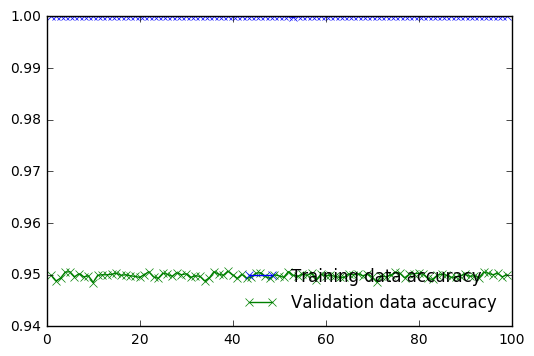

In [7]:
plt.plot(all_C, all_training_accuracy, label='Training data accuracy', marker='x')
plt.plot(all_C, all_validation_accuracy, label='Validation data accuracy', marker='x')
plt.legend(loc='lower right', frameon=False)
plt.show()

Note: 
C~=40